# Xarxa neuronal

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform as sp_rand
from scipy.stats import randint
from time import time
from sklearn import preprocessing

Using TensorFlow backend.


## Consum diari total multivariate one-step

In [2]:
daily=pd.read_csv('C:/Users/Laura/Desktop/Smart meters London/workspace R/Dades netes/Final/daily_agr_mitjanaLlarPerDia_tot.csv')
daily.head(5)

,date,apparentTemperatureMax,apparentTemperatureMin,sunsetTimeHour,weekday,season,cloudCover,humidity,visibility,month,dewPoint,pressure,energy_sum
0,2014-02-08,5.67,2.19,17,6,winter,0.47,0.77,11.20,2,3.99,979.25,11.569300
1,2013-12-24,11.93,2.68,15,2,winter,0.40,0.81,10.86,12,5.42,979.52,11.981672
2,2012-11-01,11.46,0.85,16,4,autumn,0.44,0.85,12.54,11,5.06,979.63,10.781689
3,2014-02-05,5.86,1.03,16,3,winter,0.73,0.77,10.91,2,4.06,982.20,11.415105
4,2012-04-17,10.01,2.76,19,2,spring,0.60,0.87,11.86,4,5.74,982.22,10.617443


In [3]:
#Ens quedem amb date i energy_sum, ordenem valors per data i resetejem index
daily_dia=daily[['date','energy_sum','apparentTemperatureMax','apparentTemperatureMin','humidity','pressure' ,'sunsetTimeHour', 'cloudCover']].sort_values(by=['date']).reset_index()
daily_dia.head(5)


,index,date,energy_sum,apparentTemperatureMax,apparentTemperatureMin,humidity,pressure,sunsetTimeHour,cloudCover
0,735,2011-11-23,6.952692,10.36,2.18,0.93,1027.12,16,0.36
1,736,2011-11-24,8.536480,12.93,7.01,0.89,1027.22,16,0.41
2,682,2011-11-25,9.499781,13.03,4.84,0.79,1024.47,16,0.48
3,713,2011-11-26,10.267707,12.96,4.69,0.81,1025.80,16,0.44
4,609,2011-11-27,10.850805,13.54,2.94,0.72,1021.11,16,0.42


In [4]:
daily_PCA=daily_dia[['pressure', 'sunsetTimeHour', 'cloudCover']]

In [6]:
#Escalem dades
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
daily_PCA_scaled=scaler.fit(daily_PCA).transform(daily_PCA)


c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [7]:
from sklearn.decomposition import PCA
pca_d=PCA(n_components=1)
daily_PCA_d=pca_d.fit_transform(daily_PCA_scaled)

In [8]:
daily_PCA_d

array([[-4.99610280e-01],
       [-3.49429939e-01],
       [ 4.98885254e-03],
       [-1.85492618e-01],
       [-1.36016548e-02],
       [ 6.93988133e-01],
       [ 1.47161061e+00],
       [ 8.62550510e-02],
       [ 1.50721144e+00],
       [ 4.81944780e-01],
       [ 1.59219796e+00],
       [ 1.15331319e+00],
       [ 4.14334197e-01],
       [ 7.83458078e-01],
       [ 5.56455550e-01],
       [ 1.19750593e+00],
       [ 3.01953749e-02],
       [-1.56162105e-01],
       [ 1.44674581e+00],
       [ 1.14953312e+00],
       [ 1.88225952e+00],
       [ 1.48604306e+00],
       [ 1.55900771e+00],
       [ 2.85945421e+00],
       [ 8.19690982e-01],
       [-4.04020945e-02],
       [ 8.34213264e-01],
       [ 8.30327847e-01],
       [ 1.27929487e+00],
       [ 4.01010051e-02],
       [ 1.50850347e+00],
       [-1.63533254e-01],
       [ 1.40522078e+00],
       [ 9.54025988e-01],
       [ 1.09711715e+00],
       [ 4.57978505e-01],
       [ 4.68847757e-01],
       [ 6.33379101e-01],
       [ 1.5

In [9]:
daily_dia['presSunCloud']=daily_PCA_d
daily_dia.head(5)

,index,date,energy_sum,apparentTemperatureMax,apparentTemperatureMin,humidity,pressure,sunsetTimeHour,cloudCover,presSunCloud
0,735,2011-11-23,6.952692,10.36,2.18,0.93,1027.12,16,0.36,-0.499610
1,736,2011-11-24,8.536480,12.93,7.01,0.89,1027.22,16,0.41,-0.349430
2,682,2011-11-25,9.499781,13.03,4.84,0.79,1024.47,16,0.48,0.004989
3,713,2011-11-26,10.267707,12.96,4.69,0.81,1025.80,16,0.44,-0.185493
4,609,2011-11-27,10.850805,13.54,2.94,0.72,1021.11,16,0.42,-0.013602


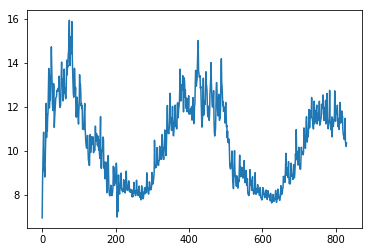

In [18]:
plt.plot(daily_dia.energy_sum )

In [10]:
daily_dia['t-1']=daily_dia['energy_sum'].shift(1)
daily_dia['t-2']=daily_dia['energy_sum'].shift(2)
daily_dia['t-3']=daily_dia['energy_sum'].shift(3)
daily_dia['t-4']=daily_dia['energy_sum'].shift(4)
daily_dia['t-5']=daily_dia['energy_sum'].shift(5)
daily_dia['t-6']=daily_dia['energy_sum'].shift(6)
daily_dia['t-7']=daily_dia['energy_sum'].shift(7)
daily_dia['t-8']=daily_dia['energy_sum'].shift(8)
daily_dia['t-9']=daily_dia['energy_sum'].shift(9)
daily_dia['t-10']=daily_dia['energy_sum'].shift(10)
daily_dia['t-11']=daily_dia['energy_sum'].shift(11)
daily_dia['t-12']=daily_dia['energy_sum'].shift(12)
daily_dia['t-13']=daily_dia['energy_sum'].shift(13)
daily_dia['t-14']=daily_dia['energy_sum'].shift(14)

daily_dia['temp(t-1)']=daily_dia['apparentTemperatureMax'].shift(1)
daily_dia['temp(t-2)']=daily_dia['apparentTemperatureMax'].shift(2)
daily_dia['temp(t-3)']=daily_dia['apparentTemperatureMax'].shift(3)
daily_dia['temp(t-4)']=daily_dia['apparentTemperatureMax'].shift(4)
daily_dia['temp(t-5)']=daily_dia['apparentTemperatureMax'].shift(5)
daily_dia['temp(t-6)']=daily_dia['apparentTemperatureMax'].shift(6)
daily_dia['temp(t-7)']=daily_dia['apparentTemperatureMax'].shift(7)
daily_dia['temp(t-8)']=daily_dia['apparentTemperatureMax'].shift(8)
daily_dia['temp(t-9)']=daily_dia['apparentTemperatureMax'].shift(9)
daily_dia['temp(t-10)']=daily_dia['apparentTemperatureMax'].shift(10)
daily_dia['temp(t-11)']=daily_dia['apparentTemperatureMax'].shift(11)
daily_dia['temp(t-12)']=daily_dia['apparentTemperatureMax'].shift(12)
daily_dia['temp(t-13)']=daily_dia['apparentTemperatureMax'].shift(13)
daily_dia['temp(t-14)']=daily_dia['apparentTemperatureMax'].shift(14)

daily_dia['tempmin(t-1)']=daily_dia['apparentTemperatureMin'].shift(1)
daily_dia['tempmin(t-2)']=daily_dia['apparentTemperatureMin'].shift(2)
daily_dia['tempmin(t-3)']=daily_dia['apparentTemperatureMin'].shift(3)
daily_dia['tempmin(t-4)']=daily_dia['apparentTemperatureMin'].shift(4)
daily_dia['tempmin(t-5)']=daily_dia['apparentTemperatureMin'].shift(5)
daily_dia['tempmin(t-6)']=daily_dia['apparentTemperatureMin'].shift(6)
daily_dia['tempmin(t-7)']=daily_dia['apparentTemperatureMin'].shift(7)
daily_dia['tempmin(t-8)']=daily_dia['apparentTemperatureMin'].shift(8)
daily_dia['tempmin(t-9)']=daily_dia['apparentTemperatureMin'].shift(9)
daily_dia['tempmin(t-10)']=daily_dia['apparentTemperatureMin'].shift(10)
daily_dia['tempmin(t-11)']=daily_dia['apparentTemperatureMin'].shift(11)
daily_dia['tempmin(t-12)']=daily_dia['apparentTemperatureMin'].shift(12)
daily_dia['tempmin(t-13)']=daily_dia['apparentTemperatureMin'].shift(13)
daily_dia['tempmin(t-14)']=daily_dia['apparentTemperatureMin'].shift(14)

daily_dia['humidity(t-1)']=daily_dia['humidity'].shift(1)
daily_dia['humidity(t-2)']=daily_dia['humidity'].shift(2)
daily_dia['humidity(t-3)']=daily_dia['humidity'].shift(3)
daily_dia['humidity(t-4)']=daily_dia['humidity'].shift(4)
daily_dia['humidity(t-5)']=daily_dia['humidity'].shift(5)
daily_dia['humidity(t-6)']=daily_dia['humidity'].shift(6)
daily_dia['humidity(t-7)']=daily_dia['humidity'].shift(7)
daily_dia['humidity(t-8)']=daily_dia['humidity'].shift(8)
daily_dia['humidity(t-9)']=daily_dia['humidity'].shift(9)
daily_dia['humidity(t-10)']=daily_dia['humidity'].shift(10)
daily_dia['humidity(t-11)']=daily_dia['humidity'].shift(11)
daily_dia['humidity(t-12)']=daily_dia['humidity'].shift(12)
daily_dia['humidity(t-13)']=daily_dia['humidity'].shift(13)
daily_dia['humidity(t-14)']=daily_dia['humidity'].shift(14)

daily_dia['presSunCloud(t-1)']=daily_dia['presSunCloud'].shift(1)
daily_dia['presSunCloud(t-2)']=daily_dia['presSunCloud'].shift(2)
daily_dia['presSunCloud(t-3)']=daily_dia['presSunCloud'].shift(3)
daily_dia['presSunCloud(t-4)']=daily_dia['presSunCloud'].shift(4)
daily_dia['presSunCloud(t-5)']=daily_dia['presSunCloud'].shift(5)
daily_dia['presSunCloud(t-6)']=daily_dia['presSunCloud'].shift(6)
daily_dia['presSunCloud(t-7)']=daily_dia['presSunCloud'].shift(7)
daily_dia['presSunCloud(t-8)']=daily_dia['presSunCloud'].shift(8)
daily_dia['presSunCloud(t-9)']=daily_dia['presSunCloud'].shift(9)
daily_dia['presSunCloud(t-10)']=daily_dia['presSunCloud'].shift(10)
daily_dia['presSunCloud(t-11)']=daily_dia['presSunCloud'].shift(11)
daily_dia['presSunCloud(t-12)']=daily_dia['presSunCloud'].shift(12)
daily_dia['presSunCloud(t-13)']=daily_dia['presSunCloud'].shift(13)
daily_dia['presSunCloud(t-14)']=daily_dia['presSunCloud'].shift(14)


daily_dia

,index,date,energy_sum,apparentTemperatureMax,apparentTemperatureMin,humidity,pressure,sunsetTimeHour,cloudCover,presSunCloud,...,presSunCloud(t-5),presSunCloud(t-6),presSunCloud(t-7),presSunCloud(t-8),presSunCloud(t-9),presSunCloud(t-10),presSunCloud(t-11),presSunCloud(t-12),presSunCloud(t-13),presSunCloud(t-14)
0,735,2011-11-23,6.952692,10.36,2.18,0.93,1027.12,16,0.36,-0.499610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,736,2011-11-24,8.536480,12.93,7.01,0.89,1027.22,16,0.41,-0.349430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,682,2011-11-25,9.499781,13.03,4.84,0.79,1024.47,16,0.48,0.004989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,713,2011-11-26,10.267707,12.96,4.69,0.81,1025.80,16,0.44,-0.185493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,609,2011-11-27,10.850805,13.54,2.94,0.72,1021.11,16,0.42,-0.013602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,641,2011-11-28,9.103382,12.58,1.31,0.86,1022.80,15,0.56,0.693988,...,-0.499610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,265,2011-11-29,9.274873,13.47,3.39,0.82,1009.70,15,0.60,1.471611,...,-0.349430,-0.499610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,571,2011-11-30,8.813513,11.87,3.34,0.78,1019.43,15,0.31,0.086255,...,0.004989,-0.349430,-0.499610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,199,2011-12-01,9.227707,12.15,5.29,0.82,1007.12,15,0.57,1.507211,...,-0.185493,0.004989,-0.349430,-0.499610,NaN,NaN,NaN,NaN,NaN,NaN
9,338,2011-12-02,10.145910,5.33,0.46,0.87,1012.12,15,0.32,0.481945,...,-0.013602,-0.185493,0.004989,-0.349430,-0.499610,NaN,NaN,NaN,NaN,NaN


In [11]:
#Ens quedem amb energies i temperatures 
#No agafem apparent temperature max ja que quan fem la predicció representa que no ho sabem
daily_dia=daily_dia.drop(['index','date','apparentTemperatureMax','apparentTemperatureMin', 'humidity','pressure','sunsetTimeHour','cloudCover', 'presSunCloud'], axis=1)
daily_dia.head(5)


,energy_sum,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,presSunCloud(t-5),presSunCloud(t-6),presSunCloud(t-7),presSunCloud(t-8),presSunCloud(t-9),presSunCloud(t-10),presSunCloud(t-11),presSunCloud(t-12),presSunCloud(t-13),presSunCloud(t-14)
0,6.952692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.536480,6.952692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.499781,8.536480,6.952692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.267707,9.499781,8.536480,6.952692,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.850805,10.267707,9.499781,8.536480,6.952692,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Eliminem les 14 primeres files ja que contenen NaN (valors buits)

daily_dia=daily_dia.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
daily_dia.head(5)

,energy_sum,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,presSunCloud(t-5),presSunCloud(t-6),presSunCloud(t-7),presSunCloud(t-8),presSunCloud(t-9),presSunCloud(t-10),presSunCloud(t-11),presSunCloud(t-12),presSunCloud(t-13),presSunCloud(t-14)
14,10.889362,11.673417,10.609714,12.163127,10.780273,10.145910,9.227707,8.813513,9.274873,9.103382,...,0.481945,1.507211,0.086255,1.471611,0.693988,-0.013602,-0.185493,0.004989,-0.349430,-0.499610
15,11.525150,10.889362,11.673417,10.609714,12.163127,10.780273,10.145910,9.227707,8.813513,9.274873,...,1.592198,0.481945,1.507211,0.086255,1.471611,0.693988,-0.013602,-0.185493,0.004989,-0.349430
16,11.759837,11.525150,10.889362,11.673417,10.609714,12.163127,10.780273,10.145910,9.227707,8.813513,...,1.153313,1.592198,0.481945,1.507211,0.086255,1.471611,0.693988,-0.013602,-0.185493,0.004989
17,12.633801,11.759837,11.525150,10.889362,11.673417,10.609714,12.163127,10.780273,10.145910,9.227707,...,0.414334,1.153313,1.592198,0.481945,1.507211,0.086255,1.471611,0.693988,-0.013602,-0.185493
18,13.749174,12.633801,11.759837,11.525150,10.889362,11.673417,10.609714,12.163127,10.780273,10.145910,...,0.783458,0.414334,1.153313,1.592198,0.481945,1.507211,0.086255,1.471611,0.693988,-0.013602


In [13]:
len(daily_dia)


816

In [14]:

#normalitzem
scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
daily_dia_norm=scaler.fit_transform(daily_dia)



In [15]:


#Seleccionem dades per test i train
y_daily=daily_dia_norm[:,0]
X_daily=daily_dia_norm[:,1:71]

#y_daily=daily_dia['energy_sum']
#X_daily=daily_dia.drop(['energy_sum'], axis='columns')



#Reshape de [samples,timesteps] a [samples,timesteps,features]

#Enlloc de 14 features en son 7 de una feature i 7 duna altre
X_daily=np.reshape(X_daily, (X_daily.shape[0], 14,5))



In [51]:

# definim model
import tensorflow as tf
model =Sequential()
model.add(LSTM(50, activation='relu', input_shape=(14, 5)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [52]:

import math
from sklearn.metrics import mean_squared_error

#Walk forward per test i train
minim=100
n_train=465
lenght=len(daily_dia)

llista_evaluate=list()
llista_prediccions=list()
llista_preditrain=list()
llista_scores=list()
llista_scoretrain=list()
sumScores=0

for i in range(n_train,lenght):
    #minim=minim+1
    X_train,X_test= X_daily[minim:i],X_daily[i:i+1]
    y_train,y_test= y_daily[minim:i],y_daily[i:i+1]

    #fem fit al model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #mostrem score
    score=model.evaluate(X_test,y_test,verbose=0)
    llista_evaluate.append(score)
    
    #Predim per cadascun
    preditest=model.predict(X_test)
    llista_prediccions.append(preditest)
    
    preditrain=model.predict(X_train)
    llista_preditrain.append(preditrain)
    
    trainScore = math.sqrt(mean_squared_error(y_train, preditrain))
    llista_scoretrain.append(trainScore )
    

    testScore = math.sqrt(mean_squared_error(y_test, preditest))
    llista_scores.append(testScore)
   
    sumScores=sumScores+testScore

In [54]:
#Dividim la suma de scores de test entre el nombre de prediccions per obtenir la mitjana
sumScores/(lenght-n_train)

0.033316675041634276

In [34]:
llista_scores

[0.0018731050269655825,
 0.0004130127271630979,
 0.0001350345544830489,
 0.001940242391487823,
 0.0023764179453218404,
 0.003626519726867228,
 0.008451423941041147,
 0.0017853031287264898,
 0.006028358273604262,
 0.02372993469874496,
 0.00724238398432675,
 0.0032857645468566954,
 0.005024914567145711,
 0.0011911436916023366,
 0.0017384305016798773,
 0.009627132615297684,
 0.005008973563262575,
 0.002788625275543577,
 0.012126589127884557,
 0.0036447698682697816,
 6.190498451696946e-05,
 0.0007925806883666286,
 0.0022148440345832743,
 0.005707398315594414,
 0.0032440574216556772,
 0.01063960565812705,
 0.0025989032949769175,
 0.001535944969907721,
 0.011250212789308378,
 0.005196471201250441,
 0.005561101801227597,
 0.007687609805147488,
 0.029968878654452302,
 0.007115857513840584,
 0.02152875960162115,
 0.01856668225872027,
 0.013044263224427421,
 0.004122668431456145,
 0.00046844631209119747,
 0.00596571646024735,
 0.008162193783750271,
 0.004649099453419292,
 0.005154794722493028,
 

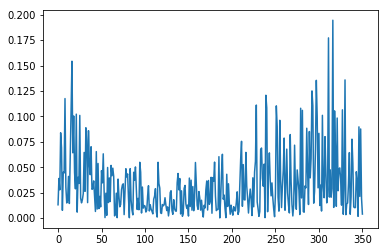

In [55]:
plt.plot(llista_scores)

In [56]:
predis=list()

for i in range(len(llista_prediccions)):
    predi=llista_prediccions[i].tolist()
    predis.append(predi)

predis=np.reshape(predis, (351)  )

predis

array([0.52706063, 0.5417161 , 0.59666014, 0.62310904, 0.56044316,
       0.52968073, 0.54947484, 0.52338785, 0.60196787, 0.83490783,
       0.69949943, 0.67981863, 0.65611017, 0.55117208, 0.64454275,
       0.64202935, 0.70649832, 0.61639667, 0.45745885, 0.52248716,
       0.5224995 , 0.68449676, 0.53556925, 0.4989506 , 0.43175182,
       0.50354701, 0.45639321, 0.39494514, 0.38088292, 0.40185714,
       0.46021831, 0.31501368, 0.34908664, 0.32603082, 0.25974885,
       0.3384777 , 0.32836333, 0.32148722, 0.26585722, 0.29880667,
       0.21608129, 0.20591053, 0.16578244, 0.19340263, 0.34867707,
       0.32863891, 0.28528023, 0.21646434, 0.22278573, 0.16421318,
       0.20329536, 0.24445802, 0.26566923, 0.15908433, 0.14675882,
       0.19351771, 0.18872513, 0.22962974, 0.24026921, 0.27548587,
       0.21997136, 0.30878723, 0.29479817, 0.25558662, 0.29067531,
       0.23940019, 0.25495809, 0.25117078, 0.19793615, 0.24328539,
       0.23535666, 0.29790989, 0.22851595, 0.20605411, 0.20762

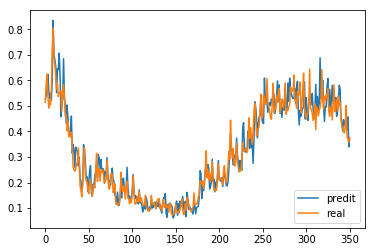

In [57]:
##Mostrem
plt.plot(predis, label="predit")
plt.plot(y_daily[n_train:lenght], label="real")
plt.legend(loc="lower right")
plt.show()

In [58]:
#Creem un dataset amb format (nombre prediccions,17) per tornar les prediccions i els valors y als reals sense normalitzar
#El necessitem d'questa mida encara que només volguem passar 2 variables ja que al fer el minmax amb 17 variables
#per fer la inversa necessitem 17 variables
#Com que només en tenim 2, les ajuntem al dataset inicial i ens quedem amb 15 variables aleatories mes
#Obtenint un dataset amb 15 variables aleatories i les 2 variables que ens interessen (predi i y)


prova=daily_dia.iloc[n_train:lenght]
prova
#len(predis)
#lenght-n_train
prova['predi']=predis
prova['y']=y_daily[n_train:lenght]
prova=prova.drop(['energy_sum','t-1'], axis=1)
prova

prova=prova[['predi','y','t-2','t-3','t-4','t-5','t-6','t-7','t-8','t-9','t-10','t-11','t-12','t-13','t-14','temp(t-1)','temp(t-2)','temp(t-3)','temp(t-4)','temp(t-5)','temp(t-6)','temp(t-7)','temp(t-8)','temp(t-9)','temp(t-10)','temp(t-11)','temp(t-12)','temp(t-13)','temp(t-14)','tempmin(t-1)','tempmin(t-2)','tempmin(t-3)','tempmin(t-4)','tempmin(t-5)','tempmin(t-6)','tempmin(t-7)','tempmin(t-8)','tempmin(t-9)','tempmin(t-10)','tempmin(t-11)','tempmin(t-12)','tempmin(t-13)','tempmin(t-14)','humidity(t-1)','humidity(t-2)','humidity(t-3)','humidity(t-4)','humidity(t-5)','humidity(t-6)','humidity(t-7)','humidity(t-8)','humidity(t-9)','humidity(t-10)','humidity(t-11)','humidity(t-12)','humidity(t-13)','humidity(t-14)','presSunCloud(t-1)','presSunCloud(t-2)','presSunCloud(t-3)','presSunCloud(t-4)','presSunCloud(t-5)','presSunCloud(t-6)','presSunCloud(t-7)','presSunCloud(t-8)','presSunCloud(t-9)','presSunCloud(t-10)','presSunCloud(t-11)','presSunCloud(t-12)','presSunCloud(t-13)','presSunCloud(t-14)']]
prova

c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,predi,y,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,presSunCloud(t-5),presSunCloud(t-6),presSunCloud(t-7),presSunCloud(t-8),presSunCloud(t-9),presSunCloud(t-10),presSunCloud(t-11),presSunCloud(t-12),presSunCloud(t-13),presSunCloud(t-14)
479,0.527061,0.514061,12.119938,12.852295,13.106773,12.823073,11.559878,10.930170,10.889469,10.675248,...,1.596041,1.865235,2.076141,1.640566,-0.128225,-0.476946,-0.468881,0.005295,0.046544,0.498792
480,0.541716,0.580609,11.786082,12.119938,12.852295,13.106773,12.823073,11.559878,10.930170,10.889469,...,0.878485,1.596041,1.865235,2.076141,1.640566,-0.128225,-0.476946,-0.468881,0.005295,0.046544
481,0.596660,0.624326,11.590859,11.786082,12.119938,12.852295,13.106773,12.823073,11.559878,10.930170,...,0.256542,0.878485,1.596041,1.865235,2.076141,1.640566,-0.128225,-0.476946,-0.468881,0.005295
482,0.623109,0.539280,12.186487,11.590859,11.786082,12.119938,12.852295,13.106773,12.823073,11.559878,...,-0.358829,0.256542,0.878485,1.596041,1.865235,2.076141,1.640566,-0.128225,-0.476946,-0.468881
483,0.560443,0.491355,12.577783,12.186487,11.590859,11.786082,12.119938,12.852295,13.106773,12.823073,...,-0.917592,-0.358829,0.256542,0.878485,1.596041,1.865235,2.076141,1.640566,-0.128225,-0.476946
484,0.529681,0.522145,11.816573,12.577783,12.186487,11.590859,11.786082,12.119938,12.852295,13.106773,...,0.659271,-0.917592,-0.358829,0.256542,0.878485,1.596041,1.865235,2.076141,1.640566,-0.128225
485,0.549475,0.504442,11.387627,11.816573,12.577783,12.186487,11.590859,11.786082,12.119938,12.852295,...,1.358076,0.659271,-0.917592,-0.358829,0.256542,0.878485,1.596041,1.865235,2.076141,1.640566
486,0.523388,0.567725,11.663214,11.387627,11.816573,12.577783,12.186487,11.590859,11.786082,12.119938,...,1.489244,1.358076,0.659271,-0.917592,-0.358829,0.256542,0.878485,1.596041,1.865235,2.076141
487,0.601968,0.719460,11.504756,11.663214,11.387627,11.816573,12.577783,12.186487,11.590859,11.786082,...,1.020850,1.489244,1.358076,0.659271,-0.917592,-0.358829,0.256542,0.878485,1.596041,1.865235
488,0.834908,0.804631,12.071173,11.504756,11.663214,11.387627,11.816573,12.577783,12.186487,11.590859,...,0.976403,1.020850,1.489244,1.358076,0.659271,-0.917592,-0.358829,0.256542,0.878485,1.596041


In [59]:
# Convert predictions back to normal values

predi = scaler.inverse_transform(prova)
print(predi)
print(predi[0][0])
print(predi[0][1])

#Les variables en posició 0 i 1 són predicció i y respectivament

[[ 1.17072077e+01  1.15908592e+01  1.15468930e+02 ... -2.86435806e+00
  -2.62099493e+00  4.71886479e-02]
 [ 1.18383810e+01  1.21864869e+01  1.12480758e+02 ... -5.66190995e+00
  -2.86435806e+00 -2.62099493e+00]
 [ 1.23301561e+01  1.25777826e+01  1.10733424e+02 ... -5.70949304e+00
  -5.66190995e+00 -2.86435806e+00]
 ...
 [ 1.10789286e+01  1.02949966e+01  1.09744859e+02 ...  2.25767498e+00
   5.92729799e+00  1.92821247e+00]
 [ 1.00285815e+01  1.02029453e+01  1.00176736e+02 ...  8.55751381e+00
   2.25767498e+00  5.92729799e+00]
 [ 1.03218070e+01  1.03563499e+01  9.91348430e+01 ...  3.19295870e+00
   8.55751381e+00  2.25767498e+00]]
11.707207664200558
11.590859170709699


In [60]:
#Fem una llista amb les prediccions i una llista amb y(valor real)

listpredi=list()
for i in range(len(predi)):
    listpredi.append(predi[i][0])
listpredi

listy=list()
for i in range(len(predi)):
    listy.append(predi[i][1])
listy

[11.590859170709699,
 12.186486909458,
 12.5777825527296,
 11.816572589134799,
 11.3876267050719,
 11.6632140210701,
 11.5047561338867,
 12.071172692490801,
 13.4292708131623,
 14.1915913964734,
 13.1182948122023,
 12.916559451200099,
 12.4960441531868,
 12.050954318124699,
 12.231575736212301,
 11.7919036962847,
 11.9327208888355,
 11.9327208888355,
 11.9824229419611,
 11.266251710893302,
 11.923225859637402,
 12.2019722473821,
 11.7314792668086,
 11.097177003906697,
 11.158295184648098,
 10.593420449120199,
 10.900387923175302,
 10.391371941845799,
 10.5597506942169,
 10.3722930491566,
 10.531617352131999,
 10.0442564420545,
 9.3196743918969,
 9.22987664514932,
 9.17927174876646,
 9.25026850964928,
 9.44901226100687,
 9.48570009257196,
 9.99667631842984,
 9.411523304475391,
 8.66526337323551,
 8.506098960360191,
 8.28206681505197,
 8.77842514832838,
 9.525847240364241,
 10.009824197825699,
 9.06303884040141,
 8.84434200802974,
 8.79350297401487,
 8.55738646036824,
 8.3922208376186,
 

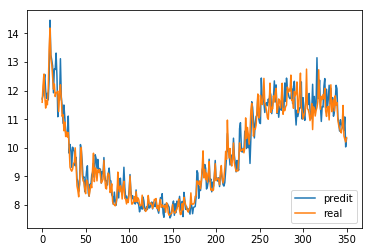

In [61]:
##Mostrem
plt.plot(listpredi, label="predit")
plt.plot(listy, label="real")
plt.legend(loc="lower right")
plt.show()

In [42]:
print(listy[300])
print(listpredi[300])

print(listy[300]-listpredi[300])
(listy[300]-listpredi[300])/listy[300]


11.0061509800784
11.658216772333365
-0.6520657922549642


-0.05924557944327957

In [62]:
llista_errors=list()
llista_errorsabs=list()
llista_errorsres=list()

    
for i in range(len(listpredi)):
    valor=listy[i]-listpredi[i]
    valorabs=math.fabs(valor)
    valorrespecte=valorabs/listy[i]
    llista_errors.append(valor)
    llista_errorsabs.append(valorabs)
    llista_errorsres.append(valorrespecte)


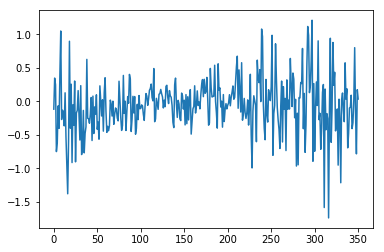

In [63]:
plt.plot(llista_errors)

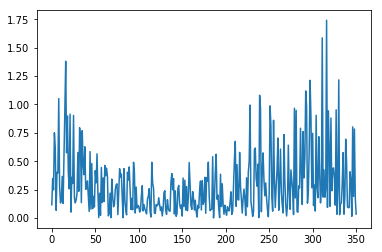

In [64]:
plt.plot(llista_errorsabs)

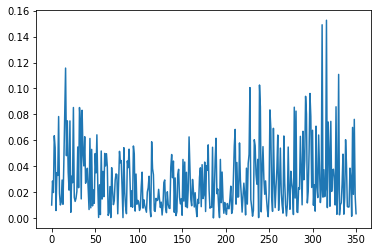

In [65]:
plt.plot(llista_errorsres)

In [66]:
sum(llista_errorsres)/(len(llista_errorsres))

0.029282023629052786